# Import Libraries

In [1]:
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
import time

# Data preprocessing

In [2]:
# load the datasheet
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# transform the y data to categorical
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# x data normalisation
x_train = x_train / np.max(x_train)
x_test = x_test / np.max(x_test)

length_training = int(0.8 * len(x_train))
length_testing = int(0.2 * len(x_train))

x_train, x_validation = tf.split(x_train, [length_training, length_testing], 0)
y_train, y_validation = tf.split(y_train, [length_training, length_testing], 0)



11501568/11490434 [==============================] - 0s 0us/step


2022-08-06 10:20:16.730888: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-06 10:20:16.848918: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-06 10:20:16.849657: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-06 10:20:16.852362: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

# Hyperparameters

In [3]:
batch_sizes_baseline = [256, length_training]
epochs = 100
batch_size = 256
rho = [0.01, 0.99]
learning_rate_rms = 0.001
learning_rate_sgd = 0.01

# Baseline Model

Epoch 1/100
188/188 [==============================] - 2s 6ms/step - loss: 0.3989 - categorical_accuracy: 0.8850 - val_loss: 0.2036 - val_categorical_accuracy: 0.9413
Epoch 2/100
188/188 [==============================] - 1s 5ms/step - loss: 0.1689 - categorical_accuracy: 0.9491 - val_loss: 0.1925 - val_categorical_accuracy: 0.9383
Epoch 3/100
188/188 [==============================] - 1s 5ms/step - loss: 0.1160 - categorical_accuracy: 0.9645 - val_loss: 0.1090 - val_categorical_accuracy: 0.9653
Epoch 4/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0863 - categorical_accuracy: 0.9736 - val_loss: 0.1333 - val_categorical_accuracy: 0.9607
Epoch 5/100
188/188 [==============================] - 1s 5ms/step - loss: 0.0673 - categorical_accuracy: 0.9792 - val_loss: 0.0946 - val_categorical_accuracy: 0.9713
Epoch 6/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0540 - categorical_accuracy: 0.9837 - val_loss: 0.0939 - val_categorical_accuracy: 0.972

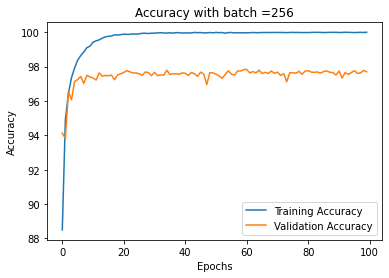

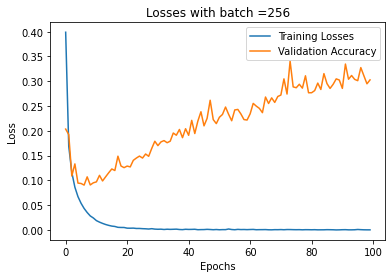

82.98917126655579
Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 2.3385 - categorical_accuracy: 0.1032 - val_loss: 2.0125 - val_categorical_accuracy: 0.5332
Epoch 2/100
1/1 [==============================] - 0s 269ms/step - loss: 2.0206 - categorical_accuracy: 0.5152 - val_loss: 1.7108 - val_categorical_accuracy: 0.6353
Epoch 3/100
1/1 [==============================] - 0s 292ms/step - loss: 1.7261 - categorical_accuracy: 0.6192 - val_loss: 1.4569 - val_categorical_accuracy: 0.7003
Epoch 4/100
1/1 [==============================] - 0s 331ms/step - loss: 1.4784 - categorical_accuracy: 0.6785 - val_loss: 1.3172 - val_categorical_accuracy: 0.6550
Epoch 5/100
1/1 [==============================] - 0s 292ms/step - loss: 1.3458 - categorical_accuracy: 0.6359 - val_loss: 1.1944 - val_categorical_accuracy: 0.6960
Epoch 6/100
1/1 [==============================] - 0s 314ms/step - loss: 1.2241 - categorical_accuracy: 0.6782 - val_loss: 0.9705 - val_categorical_accuracy: 0.

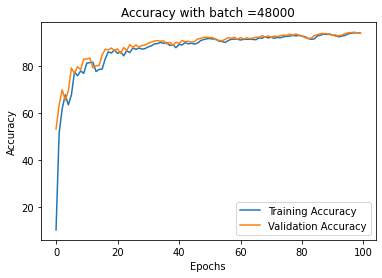

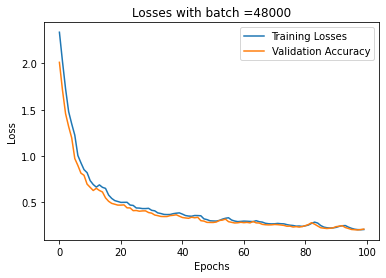

41.974064111709595


In [6]:
for batch in batch_sizes_baseline:
    start = time.time()
    model_baseline = Sequential()
    model_baseline.add(Flatten(input_shape=(28, 28)))
    model_baseline.add(Dense(128, activation='relu'))
    model_baseline.add(Dense(256, activation='relu'))
    model_baseline.add(Dense(10, activation='softmax'))
    model_baseline.compile(loss=tf.keras.losses.CategoricalCrossentropy(), metrics=[tf.keras.metrics.CategoricalAccuracy()])
    fit_model = model_baseline.fit(x_train, y_train, batch_size=batch, epochs=epochs, validation_data=(x_validation, y_validation))

    train_accuracy = [fit_model.history['categorical_accuracy'][i] * 100 for i in range(100)]
    validation_accuracy = [fit_model.history['val_categorical_accuracy'][i] * 100 for i in range(100)]

    plt.plot(train_accuracy)
    plt.plot(validation_accuracy)

    plt.title(f'Accuracy with batch =' + str(batch))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
    plt.show()
    
    train_loss = fit_model.history['loss']
    validation_loss = fit_model.history['val_loss']
    
    plt.plot(train_loss)
    plt.plot(validation_loss)

    plt.title(f'Losses with batch =' + str(batch))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training Losses', 'Validation Accuracy'], loc='upper right')
    plt.show()
    
    print(time.time() - start)

# RMSProp

In [5]:
for r in rho:
    model_rms = Sequential()
    model_rms.add(Flatten(input_shape=(28, 28)))
    model_rms.add(Dense(128, activation='relu'))
    model_rms.add(Dense(256, activation='relu'))
    model_rms.add(Dense(10, activation='softmax'))
    model_rms.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=learning_rate_rms, rho=r),
                   loss=tf.keras.losses.CategoricalCrossentropy(),
                   metrics=[tf.keras.metrics.CategoricalAccuracy()])
    history1 = model_rms.fit(Trnx, Trny, batch_size=batch_size, epochs=epochs, validation_data=(x_validation, y_validation))
    
    
    train_acc = [history1.history['categorical_accuracy'][i] * 100 for i in range(100)]
    val_acc = [history1.history['val_categorical_accuracy'][i] * 100 for i in range(100)]
    trn_los = history1.history['loss']
    val_los = history1.history['val_loss']

    plt.plot(trn_acc)
    plt.plot(val_acc)

    plt.title(f'Accuracy with rho= ' + str(rho[r]))
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Training Accuracy', 'Validation Accuracy'], loc='lower right')
    plt.savefig('Accuracy with  rho= ' + str(rho[r])+'.png')
    plt.close()

    plt.plot(trn_los)
    plt.plot(val_los)

    plt.title(f'Losses with rho= ' + str(rho[r]))
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Training Losses', 'Validation Losses'], loc='upper right')
    plt.savefig('Losses with rho= ' + str(rho[r]) + '.png')
    plt.close()

NameError: name 'Trnx' is not defined